#  Project 3: Web APIs & Classification

## Problem Statement: To find out which subreddit the given posts belong to

To identify which subreddit a particular post belongs to by creating Logistic Regression and Multinomial Naive Bayes classifier model.

## Executive Summary

Reddit is a discussion forum based in America that covers a variety of topics such as food, music, moves, news, etc. A recent research in July 2019 shows that Reddit ranks fifth in the most visited website in the states and thirteenth in the world.

With many people posting in subreddit everyday, it is important to classify the posts to the correct subreddit. By classifying the posts into the correct subreddit, users will be able to have a good user experience and website engagement may increase.

The solution to classify the posts correctly is to build a strong model with high accuracy rate of classification. 

We are able to provide a solution as we have built various model for others and have a good track record for the past years.

We would love to take on this challenge to further improve our current method of building a model and to build a more efficient model to suit your needs.

### Contents:
- [Import Libraries](#Import-Libraries)
- [Webscraping and Preparation of the 1st subreddit](#Webscraping-and-Preparation-of-the-1st-subreddit)
- [Webscraping and Preparation of the 2nd subreddit](#Webscraping-and-Preparation-of-the-2nd-subreddit)
- [EDA, Data Cleaning and Preprocessing](#EDA,-Data-Cleaning-and-Preprocessing)
- [Train-Test-Split the Data and Build a Logistic Regression Model](#Train-Test-Split-the-Data-and-Build-a-Logistic-Regression-Model)
- [Train-Test-Split the Data and Build a Multinomial Naive Bayes](#Train-Test-Split-the-Data-and-Build-a-Multinomial-Naive-Bayes)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

## Import Libraries

###### Import `requests` and other libraries needed for the project

In [1]:
import requests
import random
import time
import nltk
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import roc_curve, roc_auc_score

## Webscraping and Preparation of the 1st subreddit

###### 1. Input URL, `requests.get` and check `status_code` if there is any error

In [2]:
world_url = 'https://www.reddit.com/r/worldnews.json'

In [3]:
world_response = requests.get(world_url, headers={'User-agent': 'Pony Inc 1.0'})

In [4]:
world_response.status_code

200

###### 2. Convert into dictionary using `.json()` and identify keys using `.keys()`

In [5]:
world_dict = world_response.json()

In [6]:
world_dict.keys()

dict_keys(['kind', 'data'])

In [7]:
world_dict['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

Identify how many posts are there in the first page of the subreddit and there should be 25 of it.

In [8]:
len(world_dict['data']['children'])

25

The following cells below shows all the information for the first post on the subreddit.

In [9]:
world_dict['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'worldnews',
  'selftext': '',
  'author_fullname': 't2_4ccm762e',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'Far-Right Terrorism Has Increased 320 Percent in Just 4 Years, Extremism Watchdog Warns',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/worldnews',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'downs': 0,
  'hide_score': False,
  'name': 't3_e81b2r',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 41937,
  'total_awards_received': 1,
  'media_embed': {},
  'author_flair_template_id': None,
  'is_original_content': False,
  'user_reports': [],
  'secure_media': None,
  'is_reddit_media_domain': False,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_flair_text': None,
  'can_mod_post': False,
  'score': 41937,
  'ap

In [10]:
world_dict['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [11]:
world_dict['data']['children'][0]['kind']

't3'

In [12]:
world_dict['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'worldnews',
 'selftext': '',
 'author_fullname': 't2_4ccm762e',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Far-Right Terrorism Has Increased 320 Percent in Just 4 Years, Extremism Watchdog Warns',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/worldnews',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': None,
 'downs': 0,
 'hide_score': False,
 'name': 't3_e81b2r',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 41937,
 'total_awards_received': 1,
 'media_embed': {},
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_media_domain': False,
 'is_meta': False,
 'category': None,
 'secure_media_embed': {},
 'link_flair_text': None,
 'can_mod_post': False,
 'score': 41937,
 'approved_by': None,
 'author_premium': True,
 'thumbnail': ''

In [13]:
world_dict['data']['children'][0]['data']['subreddit']

'worldnews'

In [14]:
world_dict['data']['children'][0]['data']['title']

'Far-Right Terrorism Has Increased 320 Percent in Just 4 Years, Extremism Watchdog Warns'

###### 3. Convert all the data into a `DataFrame`

In [15]:
world_posts = [p['data'] for p in world_dict['data']['children']]

In [16]:
pd.DataFrame(world_posts).head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,worldnews,,t2_4ccm762e,False,None,0,False,Far-Right Terrorism Has Increased 320 Percent ...,[],...,None,/r/worldnews/comments/e81b2r/farright_terroris...,all_ads,False,https://www.newsweek.com/far-right-terrorism-i...,22625981,1.575847e+09,6,None,False
1,None,worldnews,,t2_t22xckq,False,None,0,False,Danish NATO event cancelled after US bars Trum...,[],...,None,/r/worldnews/comments/e7ywjv/danish_nato_event...,all_ads,False,https://www.independent.co.uk/news/world/ameri...,22625981,1.575837e+09,3,None,False
2,None,worldnews,,t2_3xiit59l,False,None,0,False,Conservative government giving NHS data to Ama...,[],...,None,/r/worldnews/comments/e7vpdj/conservative_gove...,all_ads,False,https://www.independent.co.uk/news/health/amaz...,22625981,1.575822e+09,11,None,False
3,None,worldnews,,t2_vaznr,False,None,3,False,Whistleblower goes public after leaked documen...,[],...,None,/r/worldnews/comments/e7uejk/whistleblower_goe...,all_ads,False,https://news.yahoo.com/whistleblower-goes-publ...,22625981,1.575816e+09,11,None,False
4,None,worldnews,,t2_10yxkw,False,None,0,False,"Volcano Erupts on White Island in New Zealand,...",[],...,None,/r/worldnews/comments/e83gfx/volcano_erupts_on...,all_ads,False,https://www.nzherald.co.nz/bay-of-plenty-times...,22625981,1.575858e+09,0,None,False


The below cell shows a list of names 

In [17]:
pd.DataFrame(world_posts)['name']

0     t3_e81b2r
1     t3_e7ywjv
2     t3_e7vpdj
3     t3_e7uejk
4     t3_e83gfx
5     t3_e8573s
6     t3_e85t0n
7     t3_e7zlp8
8     t3_e81rd9
9     t3_e85k7s
10    t3_e7ssjn
11    t3_e86btn
12    t3_e7wxme
13    t3_e7rtde
14    t3_e7xoec
15    t3_e80ouv
16    t3_e7xm57
17    t3_e7y5aq
18    t3_e848bf
19    t3_e83uxg
20    t3_e7wk9y
21    t3_e8335q
22    t3_e85usi
23    t3_e7zfol
24    t3_e83twe
Name: name, dtype: object

`sg_dict['data']['after']` will show the last name on the subreddit page.

In [18]:
world_dict['data']['after']

't3_e83twe'

###### 4. Create a for loop to collect more posts and save a copy into `.csv` in case something goes wrong in the loop and data won't get lost.

In [19]:
world_posts = []
after = None

for a in range(25):                    # loop will run for 25 times and load more posts
    if after == None:
        current_url = world_url
    else:
        current_url = world_url + '?after=' + after
    print(current_url)
    response = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    if response.status_code != 200:
        print('Status error', response.status_code)        # An error will surface if the status_code is not 200
        break
    
    current_dict = response.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    world_posts.extend(current_posts)
    after = current_dict['data']['after']

    if a > 0:
        prev_posts = pd.read_csv('worldnews.csv')
        current_df = pd.DataFrame()
        
    else:
        pd.DataFrame(world_posts).to_csv('worldnews.csv', index = False)        # A copy of csv containing the posts will be saved
    
    sleep_duration = random.randint(1,3)               # The loop will run again to load more post between 1 to 3 seconds
    print(sleep_duration) 
    time.sleep(sleep_duration)                 

https://www.reddit.com/r/worldnews.json
2
https://www.reddit.com/r/worldnews.json?after=t3_e83twe
1
https://www.reddit.com/r/worldnews.json?after=t3_e7wnx1
1
https://www.reddit.com/r/worldnews.json?after=t3_e7h462
3
https://www.reddit.com/r/worldnews.json?after=t3_e7sigz
2
https://www.reddit.com/r/worldnews.json?after=t3_e87hbf
1
https://www.reddit.com/r/worldnews.json?after=t3_e7td0m
2
https://www.reddit.com/r/worldnews.json?after=t3_e7r5p7
2
https://www.reddit.com/r/worldnews.json?after=t3_e7ngkh
2
https://www.reddit.com/r/worldnews.json?after=t3_e7ouly
3
https://www.reddit.com/r/worldnews.json?after=t3_e7k1we
2
https://www.reddit.com/r/worldnews.json?after=t3_e7ewa1
3
https://www.reddit.com/r/worldnews.json?after=t3_e7jvc6
1
https://www.reddit.com/r/worldnews.json?after=t3_e7jxs9
1
https://www.reddit.com/r/worldnews.json?after=t3_e7ji9z
2
https://www.reddit.com/r/worldnews.json?after=t3_e7hynb
2
https://www.reddit.com/r/worldnews.json?after=t3_e6wg1f
1
https://www.reddit.com/r/world

The total number of posts collected is 625

In [20]:
len(world_posts)

625

###### 5. Assign the new data into a variable and save a copy as `.csv`

In [21]:
world_train = pd.DataFrame(world_posts)

In [22]:
world_train.to_csv('world_train.csv', index = False)

## Webscraping and Preparation of the 2nd subreddit

###### 1. Input URL, requests.get and check status_code if there is any error

In [23]:
today_url = 'https://www.reddit.com/r/todayilearned.json'

In [24]:
today_response = requests.get(today_url, headers={'User-agent': 'Pony Inc 1.0'})

In [25]:
today_response.status_code

200

###### 2. Convert into dictionary using `.json()` and identify keys using `.keys()`

In [26]:
today_dict = today_response.json()

In [27]:
today_dict.keys()

dict_keys(['kind', 'data'])

In [28]:
today_dict['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

Identify how many posts are there in the first page of the subreddit and there should be 25 of it.

The following cells below shows all the information for the first post on the subreddit.

In [29]:
len(today_dict['data']['children'])

25

In [30]:
today_dict['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'todayilearned',
  'selftext': '',
  'author_fullname': 't2_3rjktver',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'TIL that, in 1954, Betty White was criticized for having Arthur Duncan, a black performer, on her show. When the show went national, affiliates from southern states complained and Betty said "I\'m sorry. Live with it" and gave Duncan more airtime. The show was soon cancelled.',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/todayilearned',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'downs': 0,
  'thumbnail_height': 140,
  'hide_score': False,
  'name': 't3_e85425',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 17726,
  'total_awards_received': 0,
  'media_embed': {},
  'thumbnail_width': 140,
  'author_flair_template_id': None,
  'is_

In [31]:
today_dict['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [32]:
today_dict['data']['children'][0]['kind']

't3'

In [33]:
today_dict['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'todayilearned',
 'selftext': '',
 'author_fullname': 't2_3rjktver',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'TIL that, in 1954, Betty White was criticized for having Arthur Duncan, a black performer, on her show. When the show went national, affiliates from southern states complained and Betty said "I\'m sorry. Live with it" and gave Duncan more airtime. The show was soon cancelled.',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/todayilearned',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': None,
 'downs': 0,
 'thumbnail_height': 140,
 'hide_score': False,
 'name': 't3_e85425',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 17726,
 'total_awards_received': 0,
 'media_embed': {},
 'thumbnail_width': 140,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'se

In [34]:
today_dict['data']['children'][0]['data']['subreddit']

'todayilearned'

In [35]:
today_dict['data']['children'][0]['data']['title']

'TIL that, in 1954, Betty White was criticized for having Arthur Duncan, a black performer, on her show. When the show went national, affiliates from southern states complained and Betty said "I\'m sorry. Live with it" and gave Duncan more airtime. The show was soon cancelled.'

###### 3. Convert all the data into a `DataFrame`

In [36]:
today_posts = [p['data'] for p in today_dict['data']['children']]

In [37]:
pd.DataFrame(today_posts)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,None,todayilearned,,t2_3rjktver,False,None,0,False,"TIL that, in 1954, Betty White was criticized ...",[],...,/r/todayilearned/comments/e85425/til_that_in_1...,all_ads,False,https://en.wikipedia.org/wiki/Betty_White,21846303,1.575867e+09,2,None,False,NaN
1,None,todayilearned,,t2_4azmqlxh,False,None,2,False,TIL that rapper Tech N9ne picks up bras that w...,[],...,/r/todayilearned/comments/e81x3k/til_that_rapp...,all_ads,False,https://www.xxlmag.com/news/2016/01/tech-n9ne-...,21846303,1.575850e+09,8,None,False,NaN
2,None,todayilearned,,t2_9amwg,False,None,0,False,TIL that Dolly Parton's family was so poor tha...,[],...,/r/todayilearned/comments/e80xrh/til_that_doll...,all_ads,False,https://www.rollingstone.com/music/music-featu...,21846303,1.575846e+09,2,None,False,NaN
3,None,todayilearned,,t2_10gswqiq,False,None,0,False,TIL that in a Roman hospital doctors used to h...,[],...,/r/todayilearned/comments/e7zldb/til_that_in_a...,all_ads,False,https://www.historytoday.com/history-matters/k...,21846303,1.575840e+09,3,None,False,NaN
4,None,todayilearned,,t2_u19t6,False,None,0,False,TIL that an Iraqi man slept through the invasi...,[],...,/r/todayilearned/comments/e7xrte/til_that_an_i...,all_ads,False,https://www.vice.com/en_us/article/7xjq5g/this...,21846303,1.575832e+09,8,None,False,NaN
5,None,todayilearned,,t2_vfe99,False,None,0,False,TIL the urban legend of Atari burying hundreds...,[],...,/r/todayilearned/comments/e7we9f/til_the_urban...,all_ads,False,https://www.cnet.com/news/success-atari-e-t-ga...,21846303,1.575826e+09,3,None,False,NaN
6,None,todayilearned,,t2_3wc78,False,None,0,False,TIL that the most expensive hot dog at an MLB ...,[],...,/r/todayilearned/comments/e84gar/til_that_the_...,all_ads,False,https://www.statista.com/statistics/202743/hot...,21846303,1.575863e+09,2,None,False,NaN
7,None,todayilearned,,t2_48c5510,False,None,0,False,TIL a golden chamber buried under a mountain i...,[],...,/r/todayilearned/comments/e7ulrs/til_a_golden_...,all_ads,False,https://www.businessinsider.com/super-kamiokan...,21846303,1.575817e+09,4,None,False,NaN
8,None,todayilearned,,t2_h284k,False,None,0,False,TIL That in 1991 Paul Reubens (Pee Wee Herman)...,[],...,/r/todayilearned/comments/e7txlh/til_that_in_1...,all_ads,False,https://en.wikipedia.org/wiki/Pee-wee_Herman#R...,21846303,1.575813e+09,2,None,False,NaN
9,None,todayilearned,,t2_2ggohkh8,False,None,0,False,"TIL that in Spearfish, South Dakota on January...",[],...,/r/todayilearned/comments/e7u6a0/til_that_in_s...,all_ads,False,https://www.weathernationtv.com/news/day-spear...,21846303,1.575815e+09,1,None,False,NaN


The below cell shows a list of names 

In [38]:
pd.DataFrame(today_posts)['name']

0     t3_e85425
1     t3_e81x3k
2     t3_e80xrh
3     t3_e7zldb
4     t3_e7xrte
5     t3_e7we9f
6     t3_e84gar
7     t3_e7ulrs
8     t3_e7txlh
9     t3_e7u6a0
10    t3_e85zp9
11    t3_e7t0dj
12    t3_e7vhf2
13    t3_e7z50t
14    t3_e85l04
15    t3_e826wx
16    t3_e7qiyw
17    t3_e7znks
18    t3_e7vopv
19    t3_e7qkbe
20    t3_e83g88
21    t3_e7x40w
22    t3_e83b6i
23    t3_e7w9cr
24    t3_e7ylb4
Name: name, dtype: object

`ds_dict['data']['after']` will show the last name on the subreddit page.

In [39]:
today_dict['data']['after']

't3_e7ylb4'

###### 4. Create a for loop to collect more posts and save a copy into `.csv` in case something goes wrong in the loop and data won't get lost.

In [40]:
today_posts = []
after = None

for a in range(25):           # loop will run for 25 times and load more posts
    if after == None:
        current_url = today_url
    else:
        current_url = today_url + '?after=' + after
    print(current_url)
    response = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    if response.status_code != 200:                     # An error will surface if the status_code is not 200
        print('Status error', response.status_code)
        break
    
    current_dict = response.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    today_posts.extend(current_posts)
    after = current_dict['data']['after']

    if a > 0:
        prev_posts = pd.read_csv('todayilearned.csv')     # A copy of csv containing the posts will be saved
        current_df = pd.DataFrame()
        
    else:
        pd.DataFrame(today_posts).to_csv('todayilearned.csv', index = False)
    
    sleep_duration = random.randint(1,3)       # The loop will run again to load more post between 1 to 3 seconds
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/todayilearned.json
1
https://www.reddit.com/r/todayilearned.json?after=t3_e7ylb4
2
https://www.reddit.com/r/todayilearned.json?after=t3_e7mzvd
3
https://www.reddit.com/r/todayilearned.json?after=t3_e8376j
1
https://www.reddit.com/r/todayilearned.json?after=t3_e80pkz
2
https://www.reddit.com/r/todayilearned.json?after=t3_e7ocm9
1
https://www.reddit.com/r/todayilearned.json?after=t3_e7cetf
1
https://www.reddit.com/r/todayilearned.json?after=t3_e7il3y
1
https://www.reddit.com/r/todayilearned.json?after=t3_e7fdfv
2
https://www.reddit.com/r/todayilearned.json?after=t3_e7js2i
3
https://www.reddit.com/r/todayilearned.json?after=t3_e7e8fg
1
https://www.reddit.com/r/todayilearned.json?after=t3_e74k8p
1
https://www.reddit.com/r/todayilearned.json?after=t3_e6xq2c
1
https://www.reddit.com/r/todayilearned.json?after=t3_e74prl
2
https://www.reddit.com/r/todayilearned.json?after=t3_e6ye7f
3
https://www.reddit.com/r/todayilearned.json?after=t3_e6rdb3
1
https://www.reddit.com/r

The total number of posts collected is 625

In [41]:
len(today_posts)

625

###### 5. Assign the new data into a variable and save a copy as `.csv`

In [42]:
today_train = pd.DataFrame(today_posts)

In [43]:
today_train.to_csv('today_train.csv', index = False)

## EDA, Data Cleaning and Preprocessing

###### 1. Perform data cleaning on the `'world news'` and `'todayilearned' ` subreddit

Drop columns that have more than 200 null values

In [44]:
dropnull = [feature for feature in world_train.columns if world_train[[feature]].isnull().sum()[0] > 200]

In [45]:
for features in dropnull:
    world_train.drop(features,axis=1,inplace=True)

Check the data types using `.dtypes`

In [46]:
world_train.dtypes

subreddit                 object
selftext                  object
author_fullname           object
saved                       bool
gilded                     int64
                          ...   
url                       object
subreddit_subscribers      int64
created_utc              float64
num_crossposts             int64
is_video                    bool
Length: 71, dtype: object

Drop columns that are not significant to text

In [47]:
for col in world_train:
    if world_train.dtypes[col] != 'object':
        world_train.drop(col,axis=1,inplace=True)

In [48]:
world_train.dropna(axis=1,inplace=True)

In [49]:
world_train.columns

Index(['subreddit', 'selftext', 'title', 'link_flair_richtext',
       'subreddit_name_prefixed', 'name', 'link_flair_text_color',
       'subreddit_type', 'media_embed', 'user_reports', 'secure_media_embed',
       'thumbnail', 'steward_reports', 'gildings', 'link_flair_type', 'domain',
       'all_awardings', 'awarders', 'subreddit_id',
       'link_flair_background_color', 'id', 'author', 'whitelist_status',
       'mod_reports', 'permalink', 'parent_whitelist_status', 'url'],
      dtype='object')

In [50]:
world_train_data = world_train[['subreddit','title']]

`.head()` to check the first few rows of the worldnews data

In [51]:
world_train_data.head()

,subreddit,title
0,worldnews,Far-Right Terrorism Has Increased 320 Percent ...
1,worldnews,Danish NATO event cancelled after US bars Trum...
2,worldnews,Conservative government giving NHS data to Ama...
3,worldnews,Whistleblower goes public after leaked documen...
4,worldnews,"Volcano Erupts on White Island in New Zealand,..."


Drop columns that have more than 200 null values

In [52]:
dropnull = [feature for feature in today_train.columns if today_train[[feature]].isnull().sum()[0] > 200]

Drop columns that are not significant to text

In [53]:
for features in dropnull:
    today_train.drop(features,axis=1,inplace=True)

Check the data types using `.dtypes`

In [54]:
today_train.dtypes

subreddit                 object
selftext                  object
author_fullname           object
saved                       bool
gilded                     int64
                          ...   
url                       object
subreddit_subscribers      int64
created_utc              float64
num_crossposts             int64
is_video                    bool
Length: 75, dtype: object

In [55]:
for col in today_train:
    if today_train.dtypes[col] != 'object':
        today_train.drop(col,axis=1,inplace=True)

In [56]:
today_train.dropna(axis=1,inplace=True)

In [57]:
today_train.columns

Index(['subreddit', 'selftext', 'author_fullname', 'title',
       'link_flair_richtext', 'subreddit_name_prefixed', 'name',
       'link_flair_text_color', 'subreddit_type', 'media_embed',
       'user_reports', 'secure_media_embed', 'thumbnail', 'steward_reports',
       'author_flair_richtext', 'gildings', 'link_flair_type',
       'author_flair_type', 'domain', 'all_awardings', 'awarders',
       'subreddit_id', 'link_flair_background_color', 'id', 'author',
       'whitelist_status', 'mod_reports', 'permalink',
       'parent_whitelist_status', 'url'],
      dtype='object')

In [58]:
today_train_data = today_train[['subreddit','title']]

`.head()` to check the first few rows of the worldnews data

In [59]:
today_train_data.head()

,subreddit,title
0,todayilearned,"TIL that, in 1954, Betty White was criticized ..."
1,todayilearned,TIL that rapper Tech N9ne picks up bras that w...
2,todayilearned,TIL that Dolly Parton's family was so poor tha...
3,todayilearned,TIL that in a Roman hospital doctors used to h...
4,todayilearned,TIL that an Iraqi man slept through the invasi...


###### 2. Use `.append()` to combine both dataset into a single dataframe

In [60]:
world_today_train = world_train_data.append(today_train_data)

###### 3. Under subreddit, convert `worldnews` and `todayilearned` to 1 and 0

In [61]:
world_today_train['subreddit'] = world_today_train['subreddit'].map({'worldnews':1,'todayilearned':0})

In [62]:
world_today_train.head()

,subreddit,title
0,1,Far-Right Terrorism Has Increased 320 Percent ...
1,1,Danish NATO event cancelled after US bars Trum...
2,1,Conservative government giving NHS data to Ama...
3,1,Whistleblower goes public after leaked documen...
4,1,"Volcano Erupts on White Island in New Zealand,..."


###### 4. Instantiate `SnowballStemmer()` and `WordNetLemmatizer()` and preprocess the text data

In [63]:
s_stemmer = SnowballStemmer(language='english')

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
world_today_train['title'] = sentence = [s_stemmer.stem(sentence) for sentence in world_today_train.title]

In [66]:
world_today_train['title'] = text = [lemmatizer.lemmatize(text) for text in sentence]

In [67]:
world_today_train.head()

,subreddit,title
0,1,far-right terrorism has increased 320 percent ...
1,1,danish nato event cancelled after us bars trum...
2,1,conservative government giving nhs data to ama...
3,1,whistleblower goes public after leaked documen...
4,1,"volcano erupts on white island in new zealand,..."


Reset index for the rows so that the index do not have duplicates

In [68]:
world_today_train.reset_index(drop=True)

,subreddit,title
0,1,far-right terrorism has increased 320 percent ...
1,1,danish nato event cancelled after us bars trum...
2,1,conservative government giving nhs data to ama...
3,1,whistleblower goes public after leaked documen...
4,1,"volcano erupts on white island in new zealand,..."
...,...,...
1245,0,"til in 1917, owners of the phelps dodge mining..."
1246,0,til about the icelandic yule lads: a ragtag ga...
1247,0,til about the most decorated soldier of all ti...
1248,0,til coca-cola owned columbia pictures between ...


In [69]:
world_today_train.subreddit.value_counts()

1    625
0    625
Name: subreddit, dtype: int64

###### 5. Create a function to remove HTML, non-letters, convert to lowercase and remove stop words.

In [70]:
def title_to_words(title):

    # Remove HTML.
    review_text = BeautifulSoup(title).get_text()
    
    # Remove non-letters.
    letters = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert to lower case, split into individual words.
    words = letters.lower().split()

    stops = stopwords.words('english')
    stops.append('til')
    stops = set(stops)
    
    # Remove stop words.
    meaningful_words = [w for w in words if not w in stops]    
    
    return(" ".join(meaningful_words))

## Train-Test-Split the Data and Build a Logistic Regression Model

###### 1. Split 'title' and 'subreddit' to X and y for train test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(world_today_train[['title']],
                                                    world_today_train['subreddit'],
                                                    test_size = 0.2,
                                                    random_state = 42)

Create empty lists to store clean train and test data

In [72]:
total_reviews = world_today_train.shape[0]
print(f'There are {total_reviews} reviews.')

clean_train = []
clean_test = []

There are 1250 reviews.


In [73]:
print("Cleaning and parsing the training set")

j = 0
# Append each clean training data to clean_train list
for train_review in X_train['title']:
    clean_train.append(title_to_words(train_review))      

    if (j + 1) % 100 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
    
    j += 1

print("Cleaning and parsing the testing set")

# Append each clean testing data to clean_test list
for test_review in X_test['title']:
    clean_test.append(title_to_words(test_review))

    if (j + 1) % 100 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
        
    j += 1

Cleaning and parsing the training set
Review 100 of 1250.
Review 200 of 1250.
Review 300 of 1250.
Review 400 of 1250.
Review 500 of 1250.
Review 600 of 1250.
Review 700 of 1250.
Review 800 of 1250.
Review 900 of 1250.
Review 1000 of 1250.
Cleaning and parsing the testing set
Review 1100 of 1250.
Review 1200 of 1250.


###### 2. Instantiate CountVectorizer() follow by `.fit_transform()`

In [74]:
vectorizer = CountVectorizer(max_features = 100) 

In [75]:
train_data_features = vectorizer.fit_transform(clean_train)

test_data_features = vectorizer.transform(clean_test)

In [76]:
train_data_features = train_data_features.toarray()

In [77]:
print(train_data_features.shape)

(1000, 100)


In [78]:
print(test_data_features.shape)

(250, 100)


In [79]:
train_data_features[0:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0,

Print out the features that have significant impact to the CountVectorizer

In [80]:
vocab = vectorizer.get_feature_names()
print(vocab)

['actually', 'air', 'also', 'american', 'attack', 'australia', 'back', 'big', 'boris', 'british', 'called', 'canada', 'change', 'children', 'china', 'christmas', 'city', 'climate', 'could', 'country', 'day', 'dead', 'death', 'died', 'documents', 'due', 'election', 'ever', 'film', 'fire', 'first', 'found', 'france', 'german', 'government', 'hong', 'house', 'human', 'india', 'iran', 'island', 'japan', 'johnson', 'killed', 'known', 'kong', 'last', 'later', 'least', 'life', 'like', 'live', 'made', 'man', 'men', 'million', 'money', 'name', 'new', 'north', 'old', 'one', 'people', 'police', 'president', 'protest', 'protesters', 'put', 'russian', 'said', 'saudi', 'say', 'says', 'set', 'shot', 'show', 'since', 'song', 'still', 'th', 'three', 'time', 'top', 'trump', 'two', 'uk', 'un', 'united', 'us', 'use', 'used', 'war', 'white', 'woman', 'women', 'world', 'would', 'year', 'years', 'zealand']


###### 3. Instantiate LogisticRegression() follow by fit and score

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(train_data_features, y_train)

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The below output shows the score for the training set

In [83]:
lr.score(train_data_features, y_train)

0.799

The below output shows the score for the testing set

In [84]:
lr.score(test_data_features, y_test)

0.72

In [85]:
predict = lr.predict(test_data_features)

###### 4. Create a confusion matrix

In [86]:
confusion_matrix(y_test, predict)

array([[96, 15],
       [55, 84]], dtype=int64)

In [87]:
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()

In [88]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 96
False Positives: 15
False Negatives: 55
True Positives: 84


Calculate Accuracy rate

In [89]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.72


Calculate Error rate

In [90]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.28


## Train-Test-Split the Data and Build a Multinomial Naive Bayes

###### 1. Instantiate TfidfVectorizer() and split into X and y for Train-Test-Split

Adding any words that are assumed necessary into stopwords

In [91]:
stops = stopwords.words('english')

In [92]:
stops.append('til')

Limit max_features to 100 which is the same limit as LinearRegression

In [93]:
tvec = TfidfVectorizer(max_features=100, stop_words=stops, token_pattern=r'[a-zA-Z]+')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(world_today_train[['title']],
                                                    world_today_train['subreddit'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [95]:
X_train_tvec  = pd.DataFrame(tvec.fit_transform(X_train['title']).toarray(), columns = tvec.get_feature_names())

In [96]:
X_test_tvec = tvec.transform(X_test['title']).todense()

In [97]:
X_test_tvec = pd.DataFrame(X_test_tvec, columns = tvec.get_feature_names())

List the features that are significant to the model

In [98]:
tvec.get_feature_names()[:5]

['actually', 'air', 'also', 'american', 'attack']

###### 2. Instantiate MultinomialNB() follow by fit and score

In [99]:
mnb = MultinomialNB()

In [100]:
model = mnb.fit(X_train_tvec, y_train)

In [101]:
predictions = model.predict(X_test_tvec)

In [102]:
predictions

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

The below output shows the score for the training data

In [103]:
model.score(X_train_tvec,y_train)

0.796

The below output shows the score for the testing data

In [104]:
model.score(X_test_tvec,y_test)

0.728

In [105]:
model.predict_proba(X_test_tvec)[:5]

array([[0.39174866, 0.60825134],
       [0.9370503 , 0.0629497 ],
       [0.39359602, 0.60640398],
       [0.32435561, 0.67564439],
       [0.514     , 0.486     ]])

In [106]:
prob = model.predict_proba(X_test_tvec)[:,1]

###### 3. Create a confusion matrix

In [107]:
confusion_matrix(y_test, predictions)

array([[95, 16],
       [52, 87]], dtype=int64)

In [108]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [109]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 95
False Positives: 16
False Negatives: 52
True Positives: 87


Calculate Accuracy rate

In [110]:
acc = (tp+tn)/(tn+fp+fn+tp)
print('The Accuracy rate is '+ str(acc))

The Accuracy rate is 0.728


Calculate Error rate

In [111]:
err = (fp+fn)/(tn+fp+fn+tp)
print('The Error rate is '+ str(err))

The Error rate is 0.272


###### 4. Calculate the baseline accuracy for this dataset

In [112]:
world_today_train.subreddit.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

## Conclusion and Recommendation

In [113]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, prob)

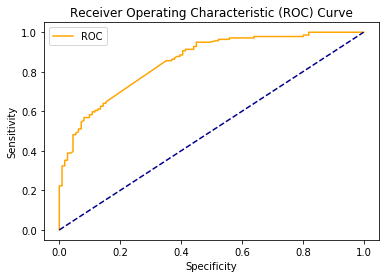

In [115]:
plot_roc_curve(fpr,tpr)

In [116]:
auc = roc_auc_score(y_test, prob)

In [117]:
auc

0.8525503921187374

In this project, we are tasked to identify posts that belong to either 'todayilearned' or 'worldnews' subreddit. After webscraping the subreddits for data, we preprocessed it and we built a Logistic Regression model as well as a Multinomial Naive Bayes model to train the data. Both models performed fairly well with 0.72 accuracy rate for Logistic Regression and 0.728 for Multinomial Naive Bayes model but Multinomial Naive Bayes model would be recommended because MultinomialNB model is more stable compared to Logistic Regression model when comparing their scores for the train set against their test set. 

For the Receiver Operating Characteristic Curve above, we want the yellow line to be as far away from the blue line as much as possible which is also represented as the Area Under Curve. The AUC for the above ROC is 0.852 which means that it is quite accurate and this is considered acceptable for our Multinomial Naive Bayes model.

[Back to top](#Executive-Summary)